# Data Science Popularization

### About the DataSet


###  Existing DataSet Provided:
The data set provided was sparse and contained limited number of attributes.<br>
Number of instances : 3316<br>
Number of attributes : 16<br><br>
Attributes : Country, Province, Category, Newspaper, Newspaper Website, Magazine, Magazine Website, Reporter Name, Reporter Email	Reporter Phone, Reporter Twitter, Reporter Linkedin, Technology	Health&Medical, Environment, Others
<br><br>
### Revised DataSet (after Extending through Scraping)
Relevant Information: The dataset after scraping was more relevant and had more number of attributes to draw relevant conclusions from. Though, it resulted in loss of few entries which were either repetitive or didn't contain enough attribute values.
<br>
Resultant Number of instances : 2976<br>
Resultant Number of attributes : 34<br><br>
Attributes:Category, Country, Environment, Gender, Health&Medical,
       Location, Magazine , Magazine Website, Newspaper,
       NewspaperWebsite, Others, Province, Reporter Name,
       Reporter Phone, ReporterEmail, ReporterLinkedin,
       ReporterTwitter, Technology, Twitter Link, User Url,
       Affiliation, Citedby, cites_per_year, email, hindex,
       hindex5y, i10index, i10index5y, id, interests, Publications,
       RawPublications', cites_pre_2007, cites_post_2007, Interests
<br>


## Scraping Journey
The following mediums have been utilized for various attributes as given.
1. Google Scholar:Affilations, Citedby, cites_per_year , interests ,publications .
2. Twitter: Email, UserUrl
3. LinkedIn: hindex, Location, i10index,10index5y,hindex5y, cites_pre_2007,cites_post_2007

# Analysis

### Importing relevant libraries

In [2]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)

import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer, CountVectorizer


from sklearn import metrics
from sklearn.manifold import TSNE
from nltk.stem.porter import PorterStemmer
from sklearn.preprocessing import Normalizer

import re
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import wordnet

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle
from tqdm import tqdm
import os
import bokeh.plotting as bp
from bokeh.models import HoverTool, BoxSelectTool
from bokeh.plotting import figure, show, output_notebook, reset_output
from bokeh.palettes import d3
import bokeh.models as bmo
from bokeh.io import save, output_file
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import MiniBatchKMeans, KMeans
from sklearn.metrics import silhouette_score

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer

### Importing the dataset

In [3]:
path = os.getcwd()
file = "\DSP_v5_2.xlsx" #dataset file
df = pd.read_excel(path+file)

## Shape of DataSet

In [4]:
df.shape

(2977, 35)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2977 entries, 0 to 2976
Data columns (total 34 columns):
Category            2976 non-null object
Country             2930 non-null object
Environment         1169 non-null float64
Gender              2651 non-null object
Health&Medical      1169 non-null float64
Location            2933 non-null object
Magazine            375 non-null object
Magazine Website    375 non-null object
Newspaper           2549 non-null object
NewspaperWebsite    2513 non-null object
Others              1169 non-null float64
Province            2782 non-null object
Reporter Name       2976 non-null object
Reporter Phone      777 non-null object
ReporterEmail       1008 non-null object
ReporterLinkedin    1187 non-null object
ReporterTwitter     1142 non-null object
Technology          1169 non-null object
Twitter Link        956 non-null object
User Url            649 non-null object
Affiliation         863 non-null object
Citedby             863 non-null fl

### Ratio of male/female reporters

In [5]:
#count of male(M) and female(F) reporters
df["Gender"].value_counts()

M    1532
F    1119
Name: Gender, dtype: int64

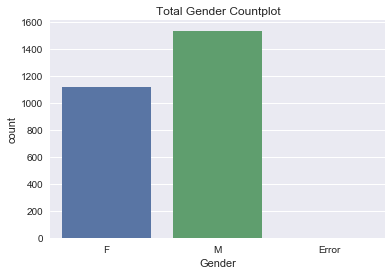

In [5]:
sns.countplot(x="Gender", data=df).set_title("Total Gender Countplot")
plt.show()

**Observation:**

- For the final dataset, we see the count of male reporters is more than that of female reporters by ~16%. (For the case of successful gender label)

### Reporters on the various domains
The data includes categories of reporting as :
 1. Technology
 2. Environment
 3. Health
 4. Others<br>
 In the analysis below, we can compare the popularity of each domain among reporters.

In [10]:
df.Technology = pd.to_numeric(df.Technology, errors='coerce').fillna(0).astype(np.int64)
df["Health&Medical"] = pd.to_numeric(df["Health&Medical"], errors='coerce').fillna(0).astype(np.int64)
df.Environment = pd.to_numeric(df.Environment, errors='coerce').fillna(0).astype(np.int64)
df.Others = pd.to_numeric(df.Others, errors='coerce').fillna(0).astype(np.int64)

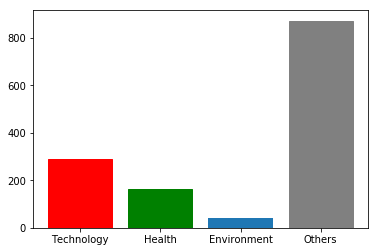

In [16]:
x = ['Technology','Health','Environment','Others']
y = [df['Technology'].sum(),df['Health&Medical'].sum(),df['Environment'].sum(),df['Others'].sum()]
barlist = plt.bar(x,y)
barlist[0].set_color("r")
barlist[1].set_color("g")
barlist[3].set_color("grey")


plt.show()

From Observing the graph it is clear that the most of them are reporting on random or uncategorized issues followed by Technology

### Top 10 countries with highest number of reporters

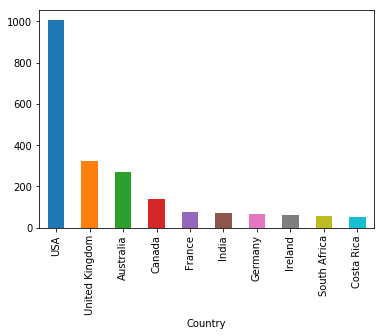

In [17]:
df.groupby(['Country'])["Reporter Name"].count().sort_values(ascending = False).head(10).plot.bar()

USA has the highest number of reporters with around ~34% of the share in the total data followed by United Kingdom and Australia.

### Gender ratio in the top 5 countries with the maximux number of reporters

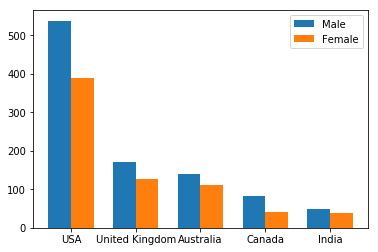

In [18]:
w=0.35
ind = np.arange(5)
male = df[(df["Gender"]=="M")].groupby(["Country"])["Reporter Name"].count().sort_values(ascending = False).head(5)
female = df[(df["Gender"]=="F")].groupby(["Country"])["Reporter Name"].count().sort_values(ascending = False).head(5)
plt.bar(ind, male, w, label="Male")
plt.bar(ind+w, female, w, label="Female")
plt.xticks(ind+w/2, male.keys())
plt.legend()
plt.show()

All the countries have a gender ration favouring men over women reporters.

### Top 15 countries with the highest number of reports in various domains

#### Technology

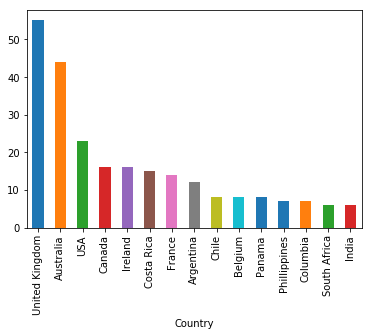

In [21]:
df[df["Technology"]==1].groupby(['Country'])["Reporter Name"].count().sort_values(ascending = False).head(15).plot.bar()

Top Countries in technology reporting are United Kingdom, Australia , USA and Canada. Interestingly,in comparison to the total number of reporters in USA, a very small share is devoted to Technology.

#### Health & Medicine

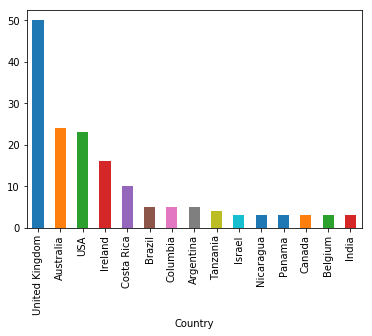

In [23]:
df[df["Health&Medical"]==1].groupby(['Country'])["Reporter Name"].count().sort_values(ascending = False).head(15).plot.bar()

Similar observations made for Medicine . UK followed by Australia and USA are leading nations for reporting in the area.

#### Environment

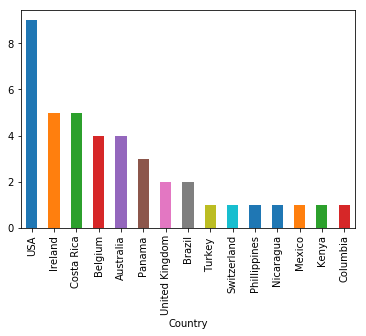

In [24]:
df[df["Environment"]==1].groupby(['Country'])["Reporter Name"].count().sort_values(ascending = False).head(15).plot.bar()

Under environment category, USA(9) is top reporting nation followed by Ireland(5) and Costa Rica(5). <br>
Though, on noticing, the actual counts of reporting are very low by each country

### People getting cited the most and their respective countries<br>
#### Most Active Reporters
On the basis of number of citations on google scholar authored by a reporter , we estimated the activity of a reporter and how frequently they indulge .<br> 

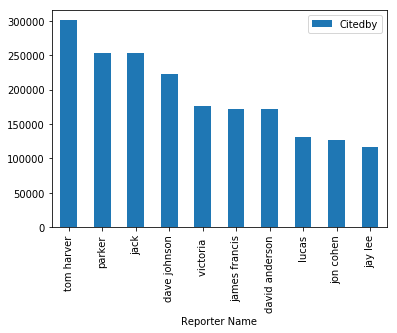

In [29]:
df[(df["Citedby"].notnull())][["Reporter Name", "Citedby", "Country"]].sort_values(by = ['Citedby'], ascending = False).head(10).plot.bar(x="Reporter Name")

Tom Harver(USA) is the most active reporter globally with citations over 0.3 million.

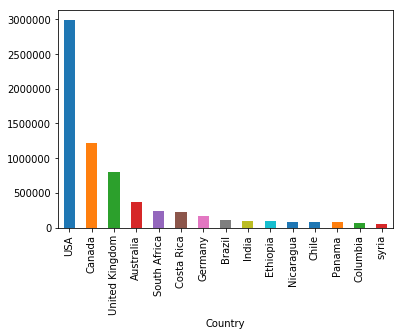

In [59]:
# df[(df["Citedby"].notnull())].sort_values(by = ['Citedby'], ascending = False).groupby(["Country"]).head(5).plot.bar(x="Country")
df[(df["Citedby"].notnull())].groupby(["Country"])["Citedby"].sum().sort_values(ascending = False).head(15).plot.bar(x="Country")
# gr_C = df[(df["Citedby"].notnull())].groupby(["Country"])["Citedby"].sum()

Overall comparison of number of citations gives us the most active nations in reporting. 
1. USA
2. Canada
3. United Kingdom

## Analysing the Textual data

In [73]:
#function for conversion of textual data to processable string
def toString(x):
    try:
        return str(x)
    except:
        return 0

In [74]:
df['RawPublications'] = df['RawPublications'].apply(lambda x:toString(x))  #text data to string - Publications

In [75]:
df['Interests'] = df['Interests'].apply(lambda x:toString(x))  #text data to string - Interests

In [76]:
#tfidf used to find relevant words in text - Raw Publications
vectorizer = TfidfVectorizer(min_df=5, analyzer='word', ngram_range=(1, 2), stop_words='english')
vz = vectorizer.fit_transform(list(df['RawPublications']))

vz.shape

(2977, 28323)

In [77]:
tfidf = dict(zip(vectorizer.get_feature_names(),vectorizer.idf_))
tfidf = pd.DataFrame(columns=['tfidf']).from_dict(dict(tfidf), orient='index')
tfidf.columns = ['tfidf']

### Visualizing the Publications using Word Cloud
Aesthetically representing the most frequent(and relevant) words in textual data using word cloud. In the cloud, Larger sized words have been more often used.

In [78]:
#higher tfidf score, more relevant words is to the context
tfidf.head()

,tfidf
aa,5.703170
aaron,6.919566
aarticle,7.053097
aarticle resource,7.053097
ab,5.666803


In [79]:
from wordcloud import WordCloud

def plot_word_cloud(terms):
    text = terms.index
    text = ' '.join(list(text))
    wordcloud = WordCloud(max_font_size=40).generate(text)
    plt.figure(figsize=(25, 25))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

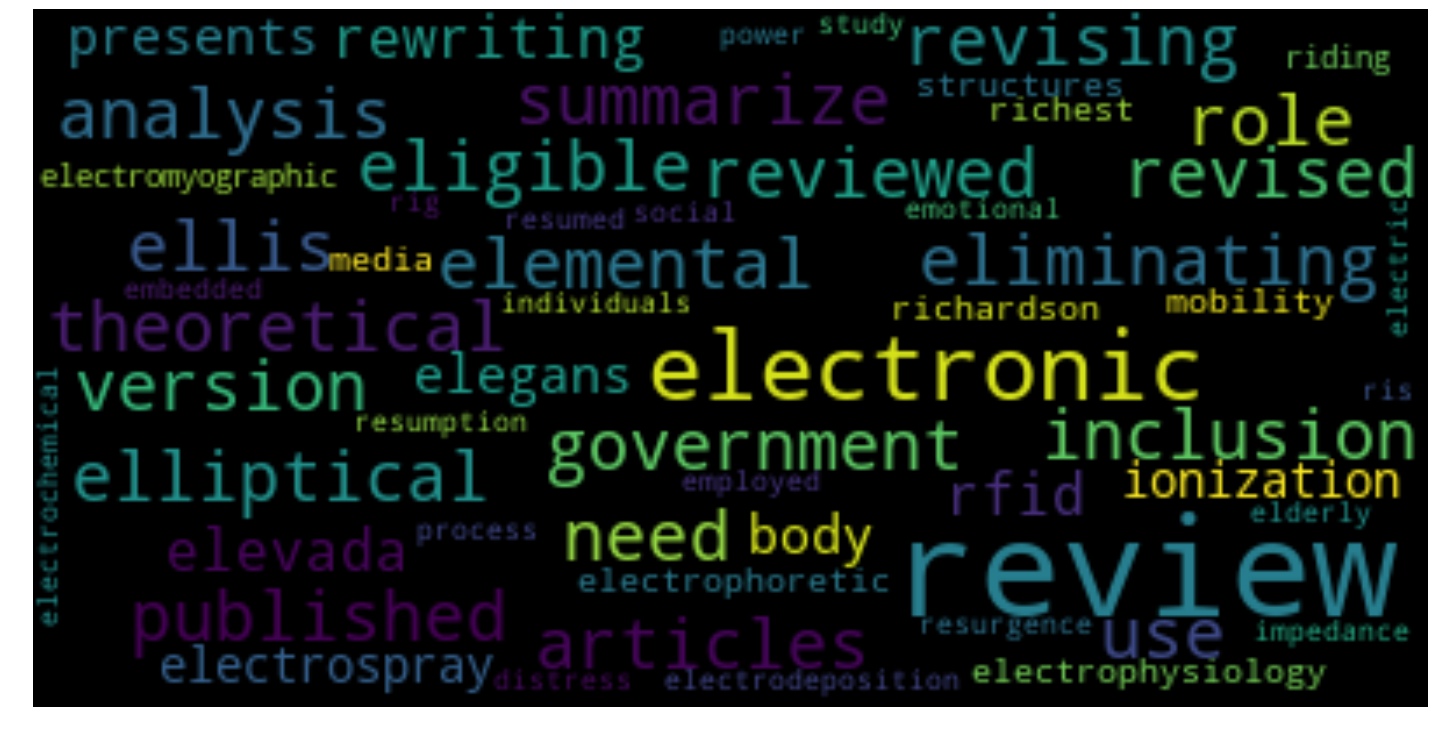

In [80]:
plot_word_cloud(tfidf.sort_values(by=['tfidf'], ascending=False).head(40))

### Visualizing the Interests using Word Cloud

In [81]:
#tfidf used to find relevant words in text
vectorizer = TfidfVectorizer(min_df=5, analyzer='word', ngram_range=(1, 2), stop_words='english')
vz_in = vectorizer.fit_transform(list(df['Interests']))

vz_in.shape

(2977, 175)

In [83]:
tfidf_in = dict(zip(vectorizer.get_feature_names(),vectorizer.idf_))
tfidf_in = pd.DataFrame(columns=['tfidf']).from_dict(dict(tfidf_in), orient='index')
tfidf_in.columns = ['tfidf']

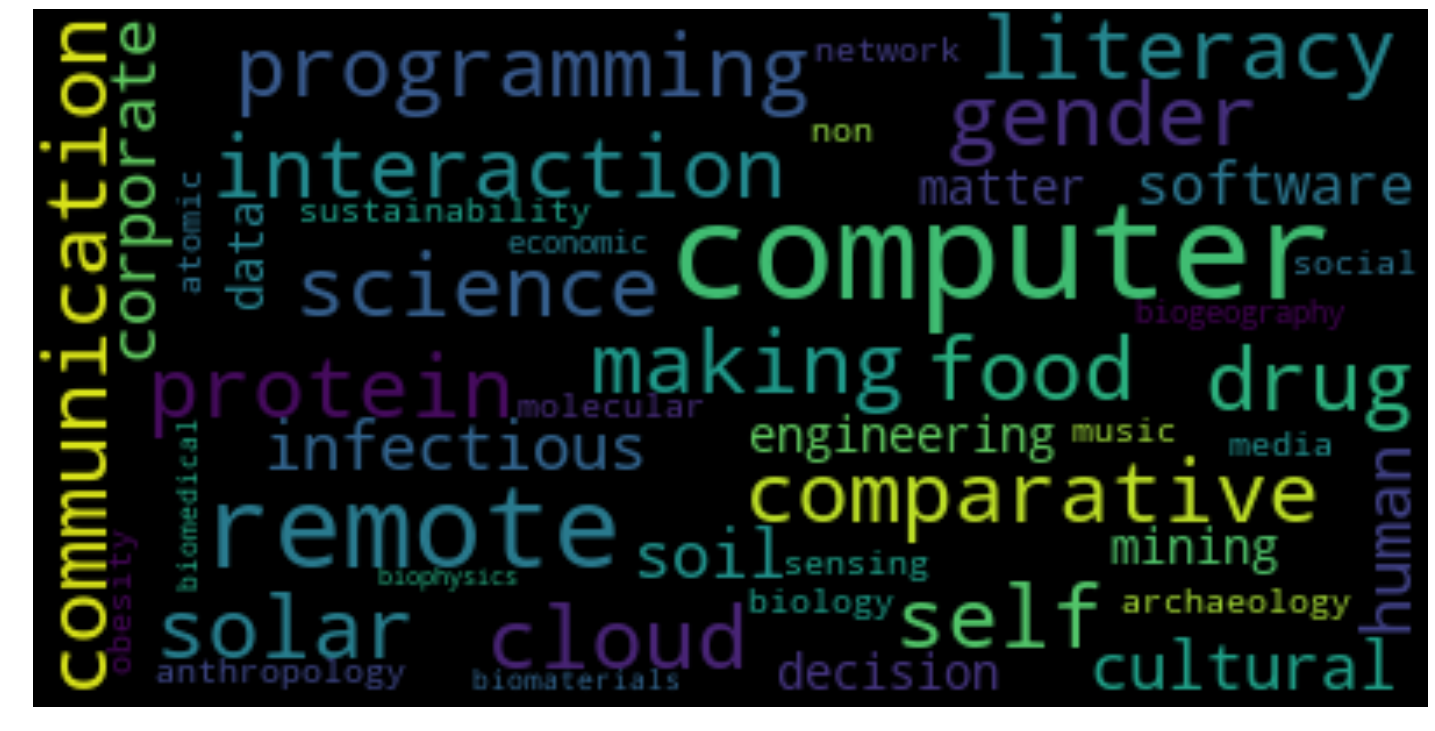

In [84]:
plot_word_cloud(tfidf_in.sort_values(by=['tfidf'], ascending=False).head(40))

### Clustering Publication Text
Purpose is to find similar reporters based on their publications through Clustering.